In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import warnings
import warnings
import time
import cv2
import copy
from google.colab.patches import cv2_imshow
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.layers import Rescaling
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Wczytanie danych MNIST, dzielenie na zbiór uczący i testowy, normalizacja.

In [ ]:
def load_dataset():
  (trainX, trainY), (testX, testY) = mnist.load_data()
  trainX = normilize(trainX.reshape((trainX.shape[0], 28, 28, 1)))
  testX = normilize(testX.reshape((testX.shape[0], 28, 28, 1)))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

def normilize(data):
  return data.astype('float32') / 255

trainX, trainY, testX, testY = load_dataset()

### Wczytanie obrazu testowego oraz implementacja klasyfikacji obazu

In [ ]:
img = cv2.resize(cv2.imread("/content/sample_image.png", cv2.IMREAD_GRAYSCALE), (28, 28))
cv2_imshow(img)

In [ ]:
def predict_class(model):
  mg = cv2.resize(cv2.imread("/content/sample_image.png", cv2.IMREAD_GRAYSCALE), (28, 28))
  print("Dodanie szumu")
  fig, axs = plt.subplots(3, 3, figsize=(6, 6), sharey=True)
  k = 0
  m = 0
  for k, szum in enumerate(np.linspace(0, 150, 9)):
    i = k % 3
    j = k // 3
    x = copy.copy(img)
    x = x + szum * np.random.randn(28,28)
    axs[j, i].imshow(x, cmap='gray')
    x = x.reshape((28, 28, 1))
    x = np.array([normilize(x)])
    axs[j, i].set_title(f"Predicted class: {np.argmax(model.predict(x), axis=-1)[0]}")
    axs[j, i].xaxis.set_ticklabels([])
    axs[j, i].yaxis.set_ticklabels([])
  plt.show()

  print("\nObrór zdjęcia")
  fig, axs = plt.subplots(1, 3, figsize=(6, 6), sharey=True)
  x = copy.copy(img)
  for i in range(3):
    x = np.rot90(x)
    x_rot = copy.copy(x)
    axs[i].imshow(x_rot, cmap='gray')
    x_rot = x_rot.reshape((28, 28, 1))
    x_rot = np.array([normilize(x_rot)])
    axs[i].set_title(f"Predicted class: {np.argmax(model.predict(x_rot), axis=-1)[0]}")
    axs[i].xaxis.set_ticklabels([])
    axs[i].yaxis.set_ticklabels([])
  plt.show()

  print("\nCykliczne przesunięcie w osi X")
  fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharey=True)
  k = 0
  m = 0
  for k, l in enumerate(np.linspace(-5, 5, 6)):
    i = k % 3
    j = k // 3
    x = copy.copy(img)
    x = np.roll(x, int(l), axis=0)
    axs[j, i].imshow(x, cmap='gray')
    x = x.reshape((28, 28, 1))
    x = np.array([normilize(x)])
    axs[j, i].set_title(f"Rolling on {l}\nPredicted class: {np.argmax(model.predict(x), axis=-1)[0]}")
    axs[j, i].xaxis.set_ticklabels([])
    axs[j, i].yaxis.set_ticklabels([])
  plt.show()

  print("\nCykliczne przesunięcie w osi Y")
  fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharey=True)
  k = 0
  m = 0
  for k, l in enumerate(np.linspace(-5, 5, 6)):
    i = k % 3
    j = k // 3
    x = copy.copy(img)
    x = np.roll(x, int(l), axis=1)
    axs[j, i].imshow(x, cmap='gray')
    x = x.reshape((28, 28, 1))
    x = np.array([normilize(x)])
    axs[j, i].set_title(f"Rolling on {l}\nPredicted class: {np.argmax(model.predict(x), axis=-1)[0]}")
    axs[j, i].xaxis.set_ticklabels([])
    axs[j, i].yaxis.set_ticklabels([])
  plt.show()

### Wpływ funkcji aktywacji na jakość uczenia

In [ ]:
def create_model(activation, optimizer, learning_rate):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(10, activation=activation, input_shape=(28*28,1)))
  opt = SGD(lr=learning_rate, momentum=0.9)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


Activation: sigmoid
Dodanie szumu


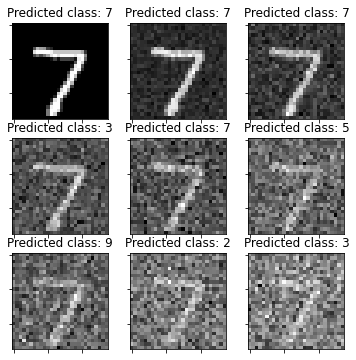


Obrór zdjęcia


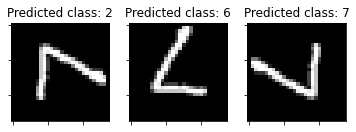


Cykliczne przesunięcie w osi X


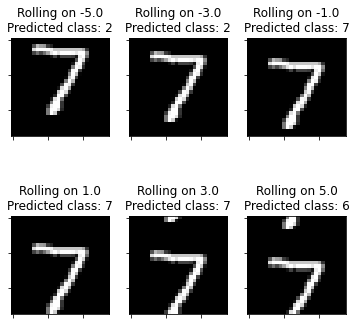


Cykliczne przesunięcie w osi Y


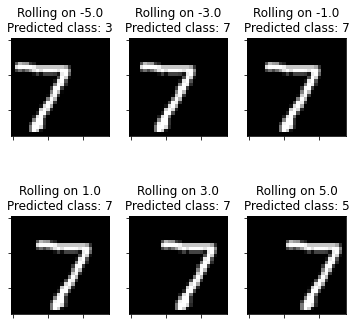


Activation: hard_sigmoid
Dodanie szumu


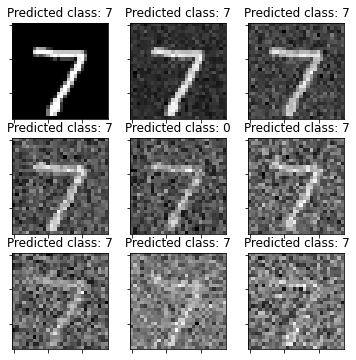


Obrór zdjęcia


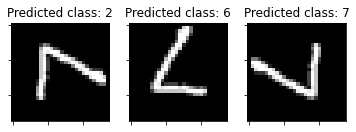


Cykliczne przesunięcie w osi X


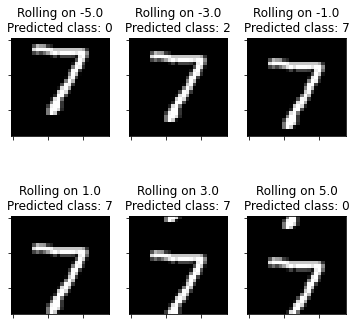


Cykliczne przesunięcie w osi Y


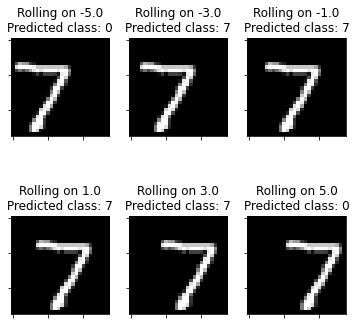


Activation: tanh
Dodanie szumu


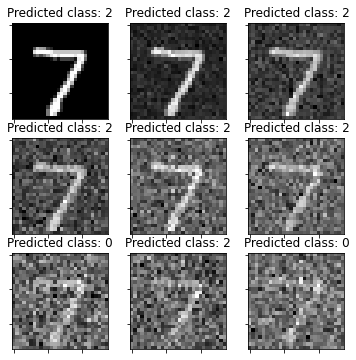


Obrór zdjęcia


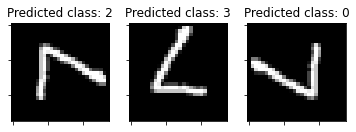


Cykliczne przesunięcie w osi X


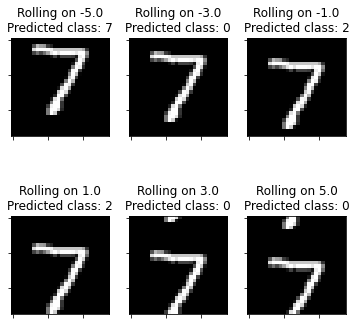


Cykliczne przesunięcie w osi Y


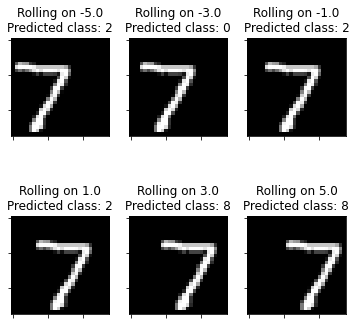


Activation: linear
Dodanie szumu


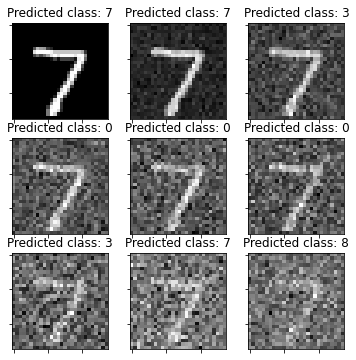


Obrór zdjęcia


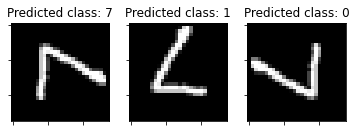


Cykliczne przesunięcie w osi X


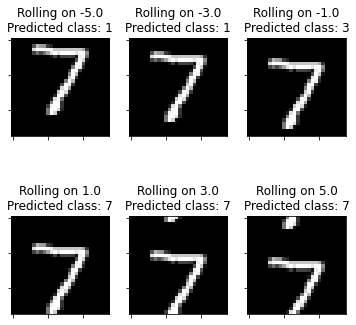


Cykliczne przesunięcie w osi Y


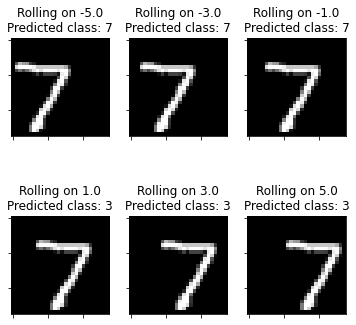


Activation: relu
Dodanie szumu


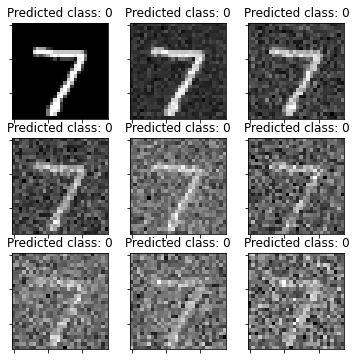


Obrór zdjęcia


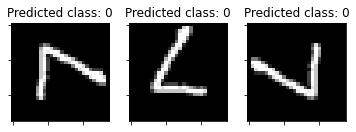


Cykliczne przesunięcie w osi X


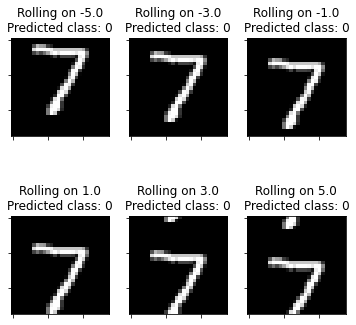


Cykliczne przesunięcie w osi Y


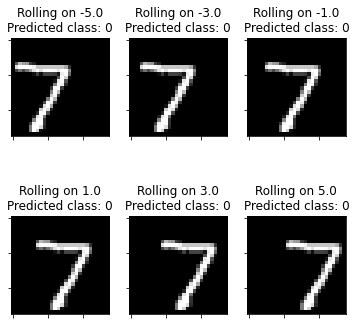


Activation: softmax
Dodanie szumu


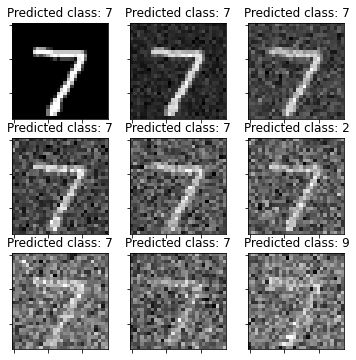


Obrór zdjęcia


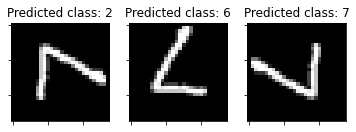


Cykliczne przesunięcie w osi X


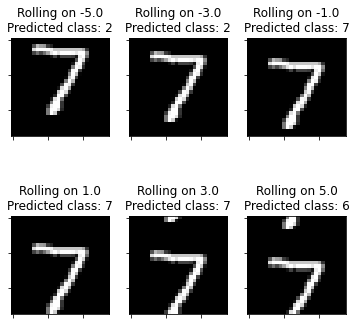


Cykliczne przesunięcie w osi Y


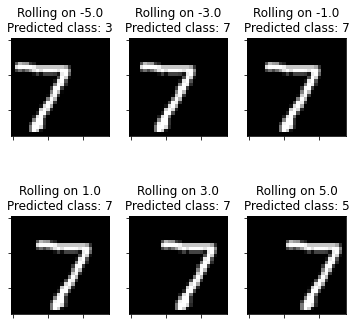

,activation,loss,accuracy,train_time,test_time
5,softmax,0.262,0.928,24.692,0.793
0,sigmoid,0.263,0.926,41.583,0.838
1,hard_sigmoid,nan,0.874,41.392,0.515
3,linear,9.579,0.121,41.339,0.767
2,tanh,9.183,0.101,25.262,0.796
4,relu,nan,0.098,41.337,0.511


In [ ]:
activation = ["sigmoid", "hard_sigmoid", "tanh", "linear", "relu", "softmax"]
columns=["activation", "loss", "accuracy", "train_time", "test_time"]
df_activation = pd.DataFrame(columns=columns)
for a in activation:
  model = create_model(a, "adam", 1e-3)
  tic = time.time()
  model.fit(trainX, trainY, epochs = 10, verbose=0)
  train_time = time.time() - tic
  tic = time.time()
  res = np.round(model.evaluate(testX,(testY), verbose=0), 3)
  test_time = time.time() - tic
  res = np.hstack((a, res, np.round([train_time, test_time], 3)))
  idf = pd.DataFrame(np.array(res).reshape((1, -1)), columns=columns)
  df_activation = df_activation.append(idf, ignore_index=True)
  print(f"\nActivation: {a}")
  predict_class(model)
df_activation.sort_values(by="accuracy", ascending=False)

### Wnioski:
- Z użyciem funckju aktywacji "softmax" oraz "sigmoid" osiągnięto dokładność podan 90%. Czas uczenia dla "sigmoid" jest w dwa razy większy niż w "softmax". Czas predykcji też jest nieco gorszy.
- Dla funkcji "hard_sigmoid" dokładność nie jest najlepsza, a czas jest podobny do "sigmoid".
- Pozostałe funkcji aktywacji nie poradziły sobie ze zbiorem.

### Wpływ liczby epok uczenia na jakość klasyfikacji


Epochs: 10
Dodanie szumu


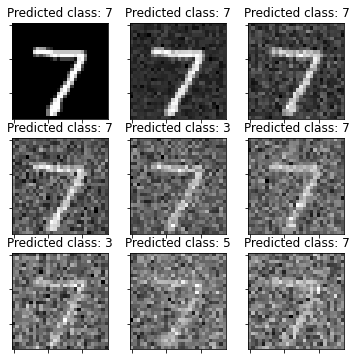


Obrór zdjęcia


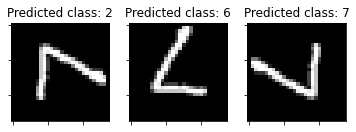


Cykliczne przesunięcie w osi X


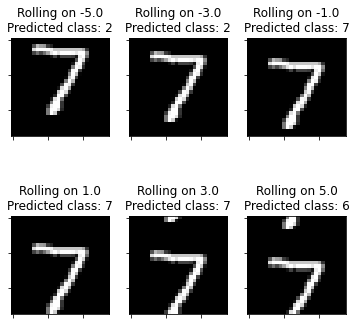


Cykliczne przesunięcie w osi Y


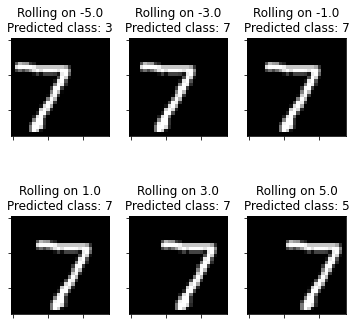


Epochs: 100
Dodanie szumu


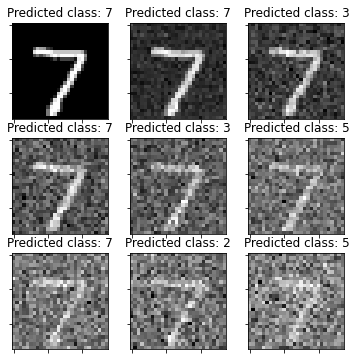


Obrór zdjęcia


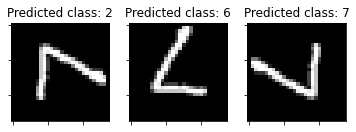


Cykliczne przesunięcie w osi X


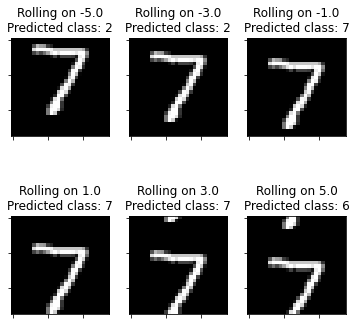


Cykliczne przesunięcie w osi Y


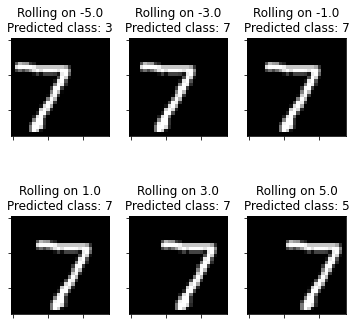


Epochs: 1000
Dodanie szumu


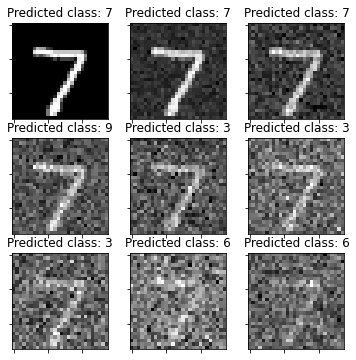


Obrór zdjęcia


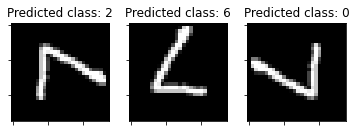


Cykliczne przesunięcie w osi X


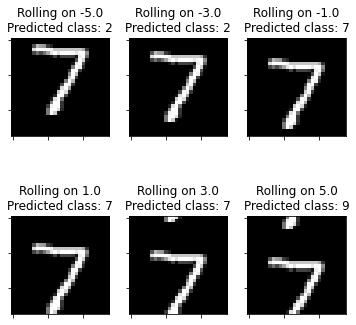


Cykliczne przesunięcie w osi Y


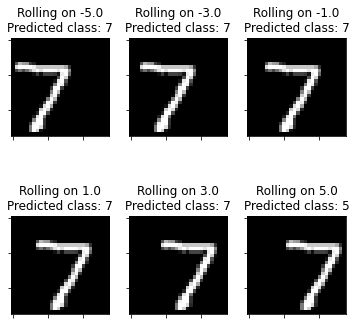

,epochs,loss,accuracy,train_time,test_time
0,softmax,0.266,0.927,24.556,0.487
1,softmax,0.298,0.927,262.277,0.528
2,softmax,0.382,0.921,2382.752,0.489


In [ ]:
epochs = [10, 100, 1000]
columns=["epochs", "loss", "accuracy", "train_time", "test_time"]
df_epochs = pd.DataFrame(columns=columns)
for ep in epochs:
  model = create_model("softmax", "adam", 1e-3)
  tic = time.time()
  history = model.fit(trainX, trainY, epochs = ep, verbose=0)
  train_time = time.time() - tic
  tic = time.time()
  res = np.round(model.evaluate(testX,(testY), verbose=0), 3)
  test_time = time.time() - tic
  res = np.hstack((ep, res, np.round([train_time, test_time], 3)))
  idf = pd.DataFrame(np.array(res).reshape((1, -1)), columns=columns)
  df_epochs = df_epochs.append(idf, ignore_index=True)
  print(f"\nEpochs: {ep}")
  predict_class(model)
df_epochs.sort_values(by="accuracy", ascending=False)

In [ ]:
df_epochs

,epochs,loss,accuracy,train_time,test_time
0,10,0.266,0.927,24.556,0.487
1,100,0.298,0.927,262.277,0.528
2,100,0.382,0.921,2382.752,0.489


In [ ]:
df = pd.DataFrame(history.history)
fig = go.Figure()
fig = fig.add_trace(go.Scatter(x=df.index, y=df["accuracy"], name="Accuracy"))
fig.update_layout(title="Zmiana dokładności wraz ze wzrostem liczby epok", xaxis_title="Epochs", yaxis_title="Accuracy")
fig.show()

### Wnioski:
- Najlepszą dokładność osiągnięto przy 200-300 epokach, do 300 dokładność rosła, po czym zachowywała się stale. 
- Wraz ze wzrostem ilości epok czas uczenia też rósł.

### Wpływ optymalizatora na jakość uczenia


Optimizer: adam
Dodanie szumu


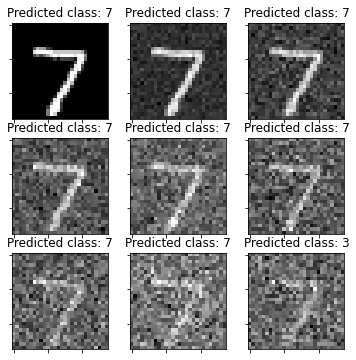


Obrór zdjęcia


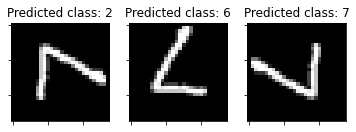


Cykliczne przesunięcie w osi X


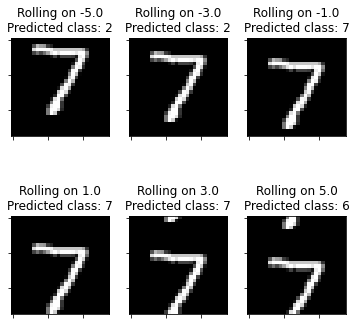


Cykliczne przesunięcie w osi Y


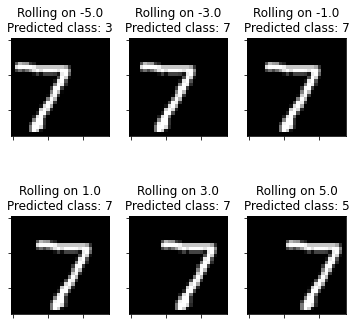


Optimizer: sgd
Dodanie szumu


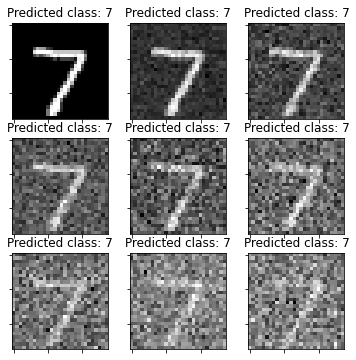


Obrór zdjęcia


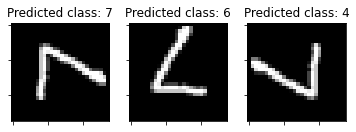


Cykliczne przesunięcie w osi X


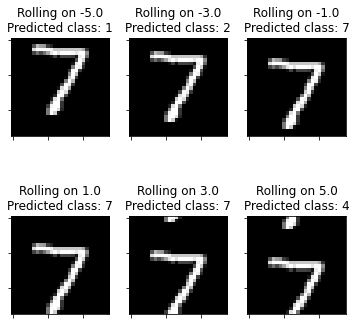


Cykliczne przesunięcie w osi Y


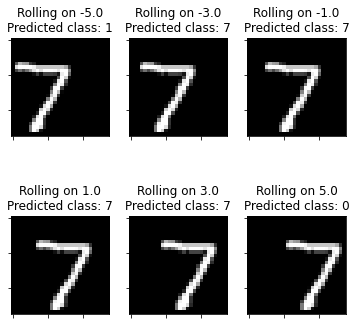


Optimizer: adadelta
Dodanie szumu


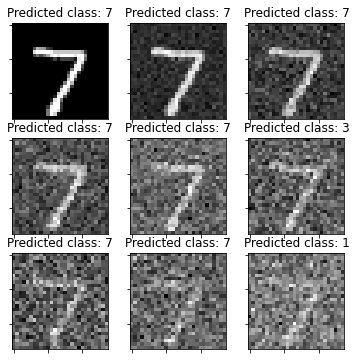


Obrór zdjęcia


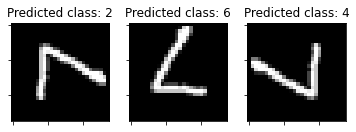


Cykliczne przesunięcie w osi X


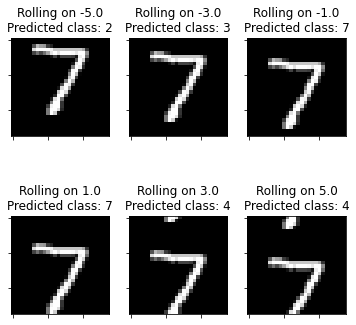


Cykliczne przesunięcie w osi Y


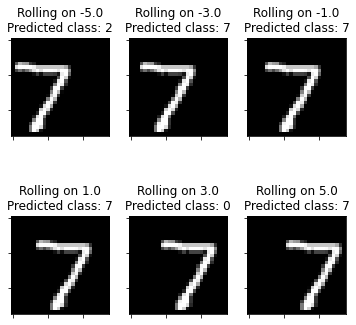


Optimizer: adagrad
Dodanie szumu


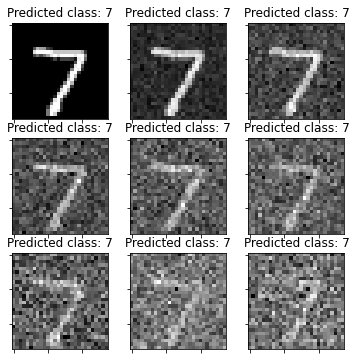


Obrór zdjęcia


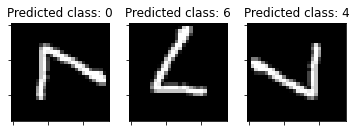


Cykliczne przesunięcie w osi X


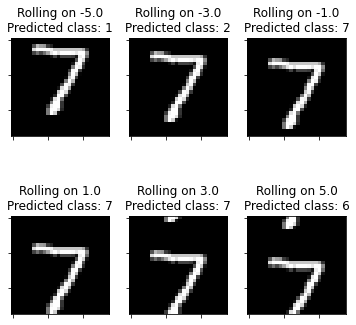


Cykliczne przesunięcie w osi Y


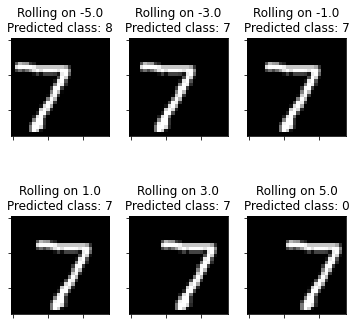


Optimizer: rmsprop
Dodanie szumu


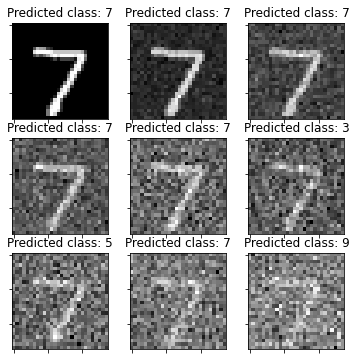


Obrór zdjęcia


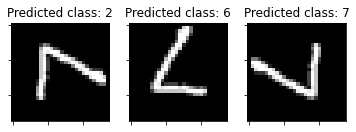


Cykliczne przesunięcie w osi X


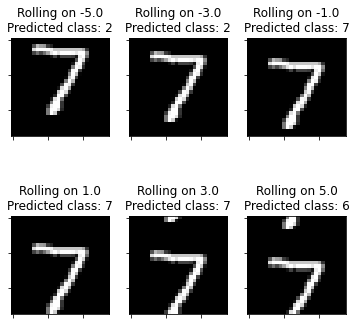


Cykliczne przesunięcie w osi Y


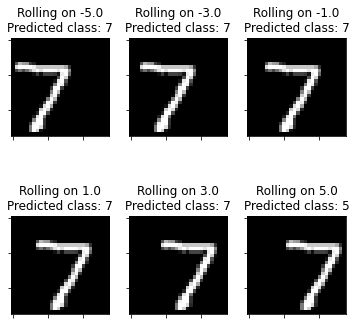

,optimizer,loss,accuracy,train_time,test_time
0,adam,0.266,0.927,25.122,0.789
4,rmsprop,0.296,0.925,41.386,0.532
1,sgd,0.305,0.915,21.833,0.778
3,adagrad,0.566,0.873,41.291,0.484
2,adadelta,1.658,0.596,22.554,0.782


In [ ]:
optimizer = ["adam", "sgd", "adadelta", "adagrad", "rmsprop"]
columns=["optimizer", "loss", "accuracy", "train_time", "test_time"]
df_optimizer = pd.DataFrame(columns=columns)
for opt in optimizer:
  model = create_model("softmax", opt, 1e-3)
  tic = time.time()
  model.fit(trainX, trainY, epochs = 10, verbose=0)
  train_time = time.time() - tic
  tic = time.time()
  res = np.round(model.evaluate(testX,(testY), verbose=0), 3)
  test_time = time.time() - tic
  res = np.hstack((opt, res, np.round([train_time, test_time], 3)))
  idf = pd.DataFrame(np.array(res).reshape((1, -1)), columns=columns)
  df_optimizer = df_optimizer.append(idf, ignore_index=True)
  print(f"\nOptimizer: {opt}")
  predict_class(model)
df_optimizer.sort_values(by="accuracy", ascending=False)

Wnioski:
- Najlepszą dokładność uzyskano z użyciem algorytmu "adam", czasowo też nie wykazał się najgorzej.
- Z zastosowaniem algorytmu "rmsprop" usyskano podobną dokładność to wspomnianego wcześniej, i chociaż czas uczenia był dwukrotnie większy, predykcja zajęła nieco mniej czasu.

### Wpływ kroku uczenia na jakość uczenia


Learning rate: 0.001
Dodanie szumu


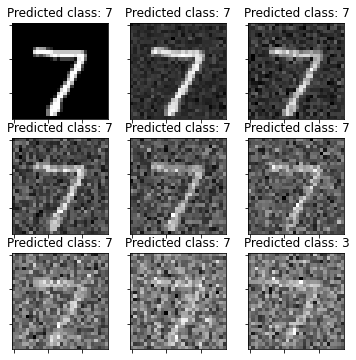


Obrór zdjęcia


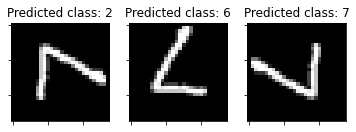


Cykliczne przesunięcie w osi X


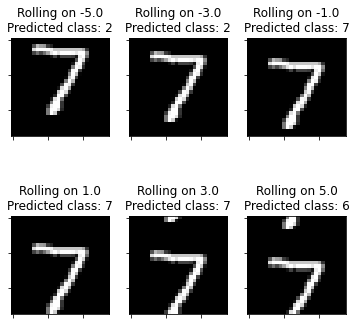


Cykliczne przesunięcie w osi Y


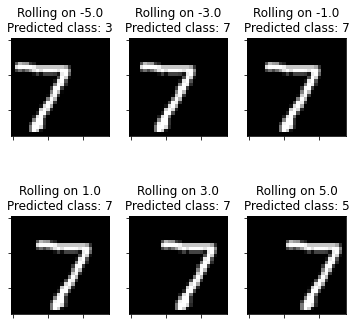


Learning rate: 0.051000000000000004
Dodanie szumu


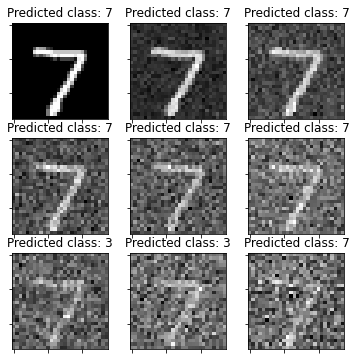


Obrór zdjęcia


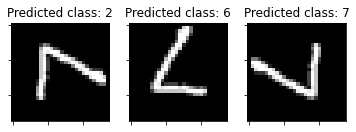


Cykliczne przesunięcie w osi X


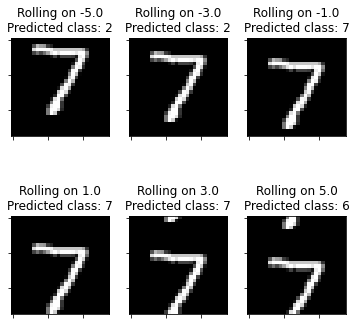


Cykliczne przesunięcie w osi Y


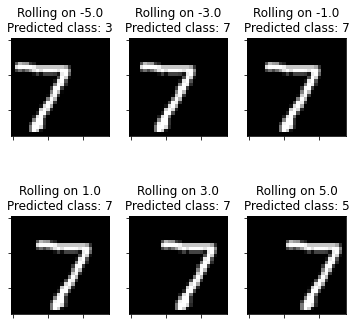


Learning rate: 0.101
Dodanie szumu


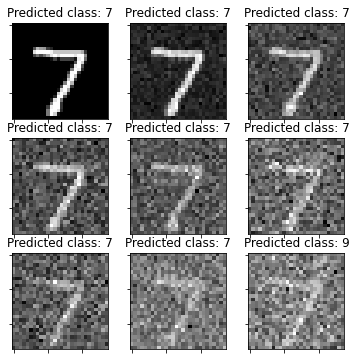


Obrór zdjęcia


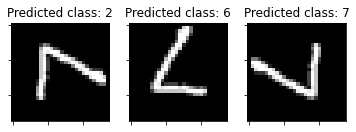


Cykliczne przesunięcie w osi X


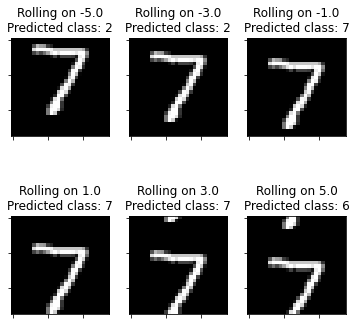


Cykliczne przesunięcie w osi Y


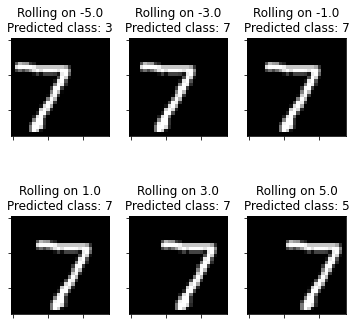


Learning rate: 0.15100000000000002
Dodanie szumu


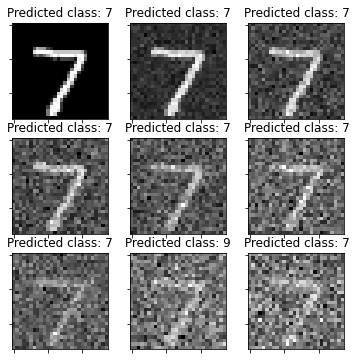


Obrór zdjęcia


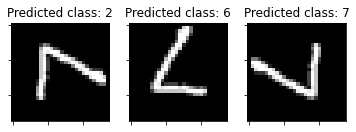


Cykliczne przesunięcie w osi X


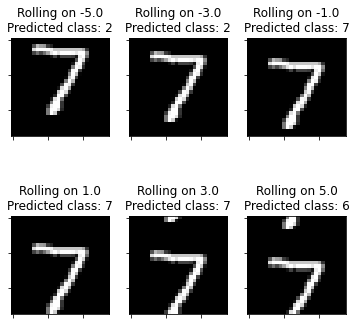


Cykliczne przesunięcie w osi Y


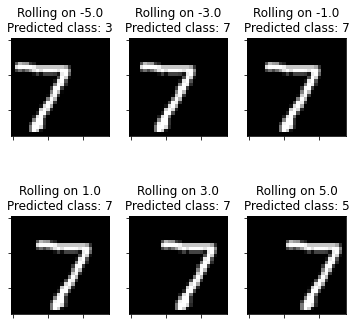


Learning rate: 0.201
Dodanie szumu


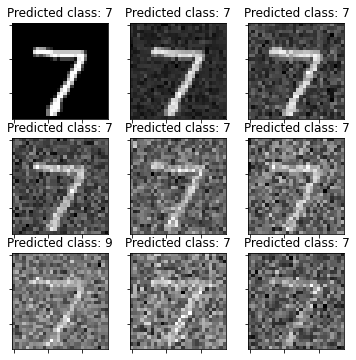


Obrór zdjęcia


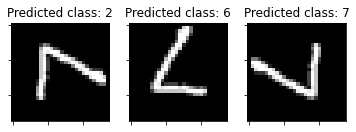


Cykliczne przesunięcie w osi X


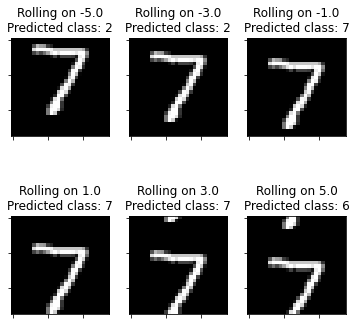


Cykliczne przesunięcie w osi Y


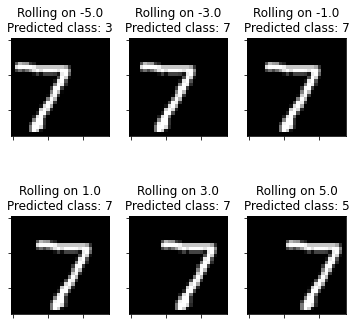


Learning rate: 0.251
Dodanie szumu


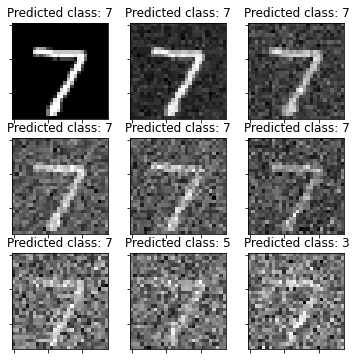


Obrór zdjęcia


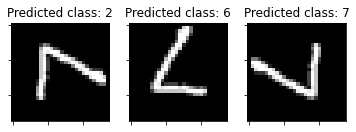


Cykliczne przesunięcie w osi X


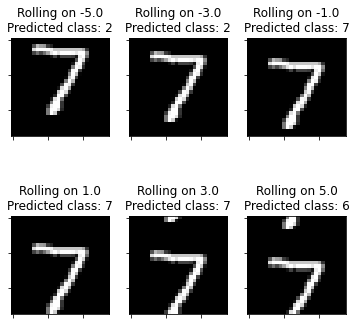


Cykliczne przesunięcie w osi Y


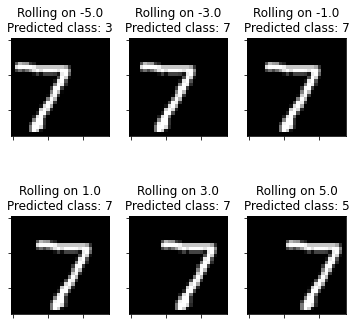


Learning rate: 0.30100000000000005
Dodanie szumu


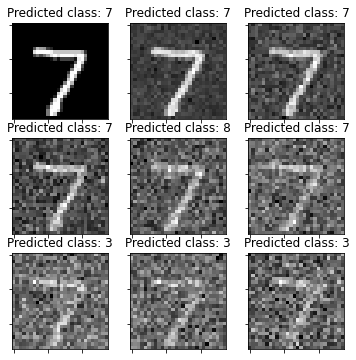


Obrór zdjęcia


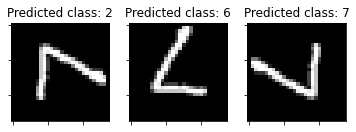


Cykliczne przesunięcie w osi X


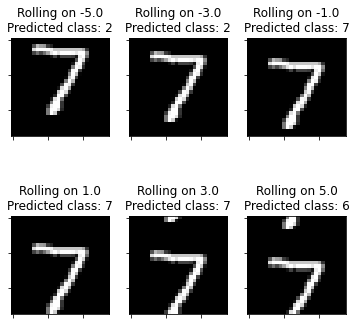


Cykliczne przesunięcie w osi Y


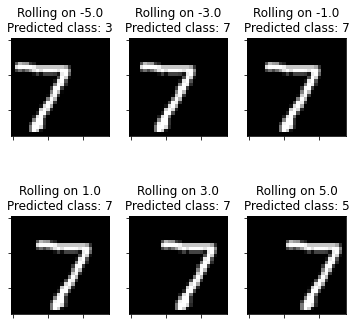


Learning rate: 0.35100000000000003
Dodanie szumu


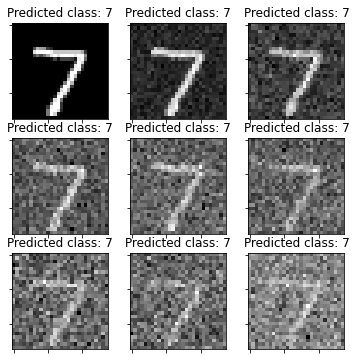


Obrór zdjęcia


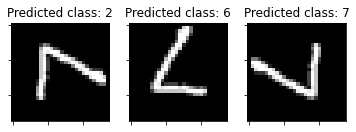


Cykliczne przesunięcie w osi X


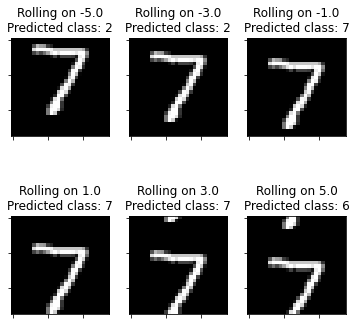


Cykliczne przesunięcie w osi Y


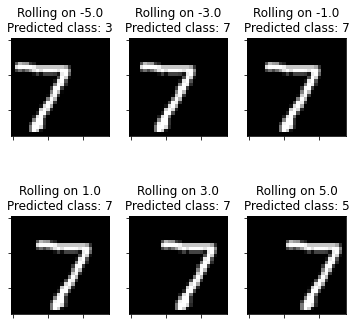


Learning rate: 0.401
Dodanie szumu


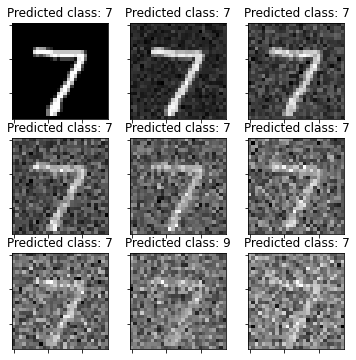


Obrór zdjęcia


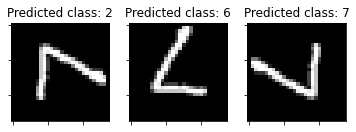


Cykliczne przesunięcie w osi X


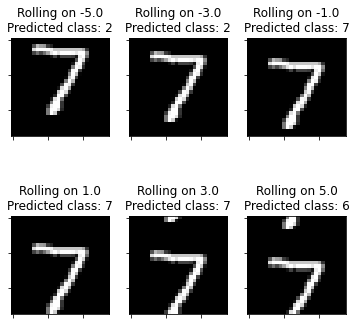


Cykliczne przesunięcie w osi Y


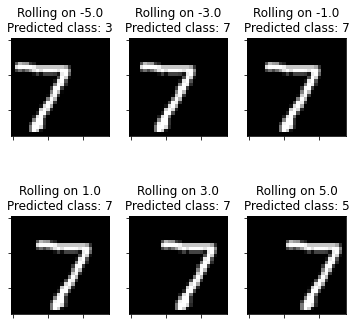


Learning rate: 0.451
Dodanie szumu


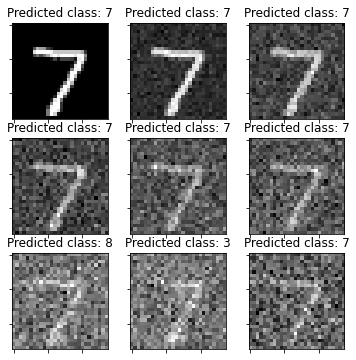


Obrór zdjęcia


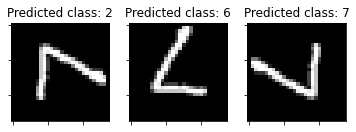


Cykliczne przesunięcie w osi X


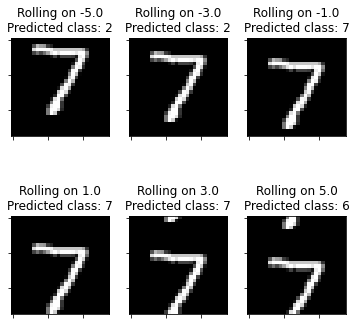


Cykliczne przesunięcie w osi Y


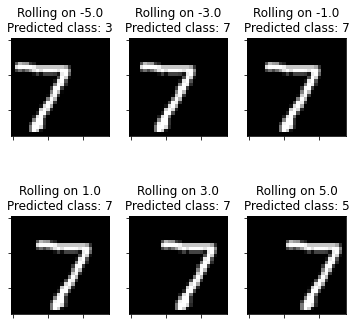

,learning_rate,loss,accuracy,train_time,test_time
0,0.001,0.266,0.928,41.313,0.792
6,0.301,0.263,0.928,25.258,0.481
1,0.051,0.265,0.927,23.989,0.480
2,0.101,0.262,0.927,41.334,0.780
7,0.351,0.262,0.927,24.736,0.480
8,0.401,0.268,0.927,23.993,0.789
4,0.201,0.267,0.926,25.009,0.794
5,0.251,0.263,0.926,41.376,0.503
9,0.451,0.267,0.926,24.544,0.811
3,0.151,0.271,0.925,41.316,0.537


In [ ]:
learning_rate = np.arange(1e-3, 5e-1, 5e-2)
columns=["learning_rate", "loss", "accuracy", "train_time", "test_time"]
df_learning_rate = pd.DataFrame(columns=columns)
for l_r in learning_rate:
  model = create_model("softmax", "adam", l_r)
  tic = time.time()
  model.fit(trainX, trainY, epochs = 10, verbose=0)
  train_time = time.time() - tic
  tic = time.time()
  res = np.round(model.evaluate(testX,(testY), verbose=0), 3)
  test_time = time.time() - tic
  res = np.hstack((l_r, res, np.round([train_time, test_time], 3)))
  idf = pd.DataFrame(np.array(res).reshape((1, -1)), columns=columns)
  df_learning_rate = df_learning_rate.append(idf, ignore_index=True)
  print(f"\nLearning rate: {l_r}")
  predict_class(model)
df_learning_rate.sort_values(by="accuracy", ascending=False)

### Wnioski:
- Wraz ze wzrosem współczynnkika uczenia dokładność się nie znie zmienia. Możliwie dla porównania wzięto błędny przedział wartości aby móc dostrzec jakiekolwiek zmiany. Czas uczenia też nie wydłuża się.
- Większość klasyfikatorów dobrze radzi sobie z szumem na obrazie oraz z cyklicznym przesunięciem na osi Y.
- Klasyfikatory nie poradziły sobie z obrotami o 90, 180, 270 stopni.
- Mniejszość sklasyfikowała poprawnie objekt przy cyklicznym przesunięciu obrazu wzdłuż osi X.